In [1]:
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

from utils.gmm_posterior import gmm_posterior
import matplotlib
#matplotlib.use('Agg')

## Binary (Banknote autentification)
### Noisy Natarajan matrix

In [29]:
df_list = []
folder_path = 'Results/banknote-authentication_Noisy_Natarajan'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\1715628276.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\1715628276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\1715628276.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.692799,Backward,0,0.2,Train
1,2,0.754786,Backward,0,0.2,Train
2,3,0.818596,Backward,0,0.2,Train
3,4,0.855971,Backward,0,0.2,Train
4,5,0.882407,Backward,0,0.2,Train
...,...,...,...,...,...,...
5995,46,0.967273,Forward,9,0.4,Test
5996,47,0.967273,Forward,9,0.4,Test
5997,48,0.967273,Forward,9,0.4,Test
5998,49,0.967273,Forward,9,0.4,Test


['Backward', 'Forward']


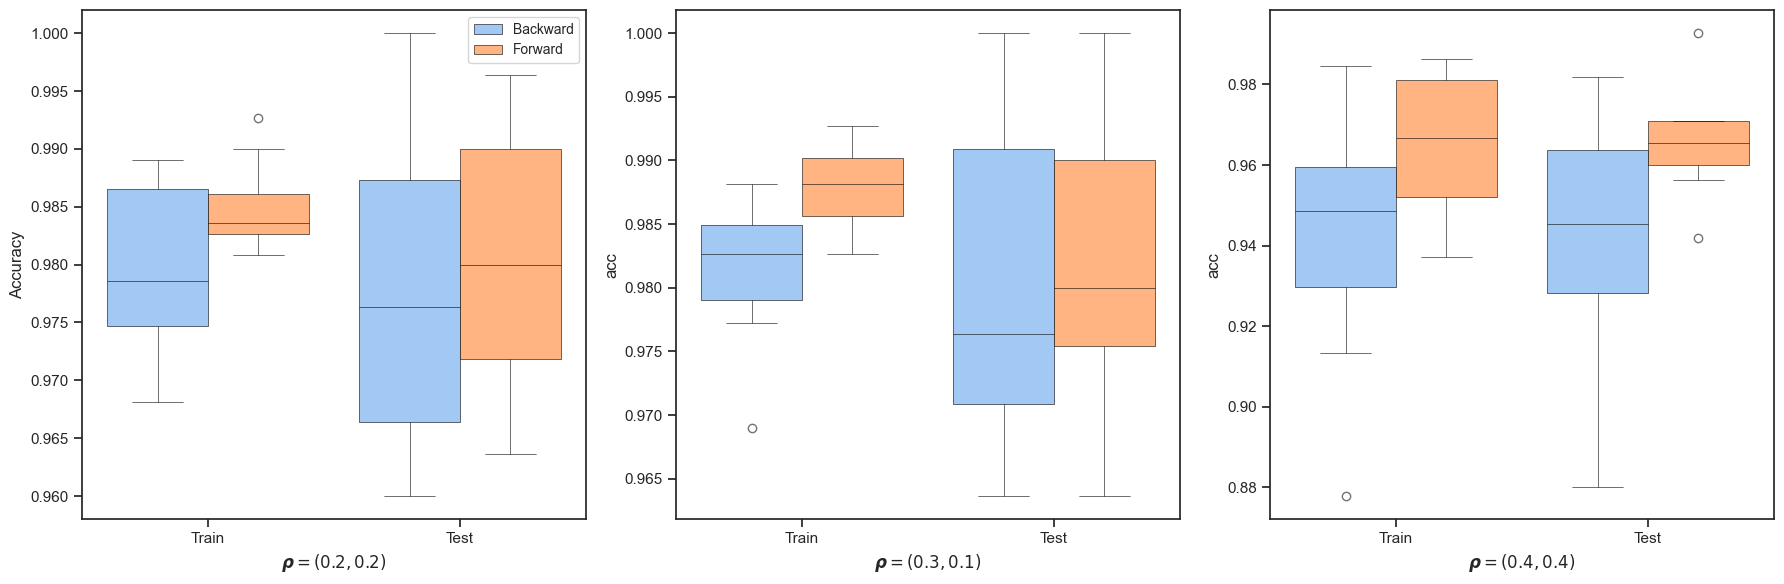

In [30]:
selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.3]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.4]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward', 'Forward']#'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Forward']#'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', , r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\boldsymbol{\rho}=(0.2,0.2)$')
axes[0].set_ylabel('Accuracy')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, new_labels,prop={'size': 10})
print(labels)
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\boldsymbol{\rho}=(0.3,0.1)$')
#axes[1].set_ylabel('Accuracy')
axes[1].legend().remove()

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\boldsymbol{\rho}=(0.4,0.4)$')
#axes[2].set_ylabel('Accuracy')
axes[2].legend().remove()

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig2.eps', format='eps',dpi=1000)

# MNIST
## Noisy

In [33]:
df_list = []
folder_path = 'Results/mnist_Noisy_Patrini_MNIST'
#folder_path = 'Results/Old/mnist_Noisy_Patrini_MNIST'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\3602214696.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\3602214696.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\3602214696.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.830900,Backward,0,0.2,Train
1,2,0.900733,Backward,0,0.2,Train
2,3,0.909733,Backward,0,0.2,Train
3,4,0.915800,Backward,0,0.2,Train
4,5,0.920083,Backward,0,0.2,Train
...,...,...,...,...,...,...
5395,46,0.970000,Forward,8,0.8,Test
5396,47,0.971900,Forward,8,0.8,Test
5397,48,0.971900,Forward,8,0.8,Test
5398,49,0.973000,Forward,8,0.8,Test


['Backward', 'Forward']


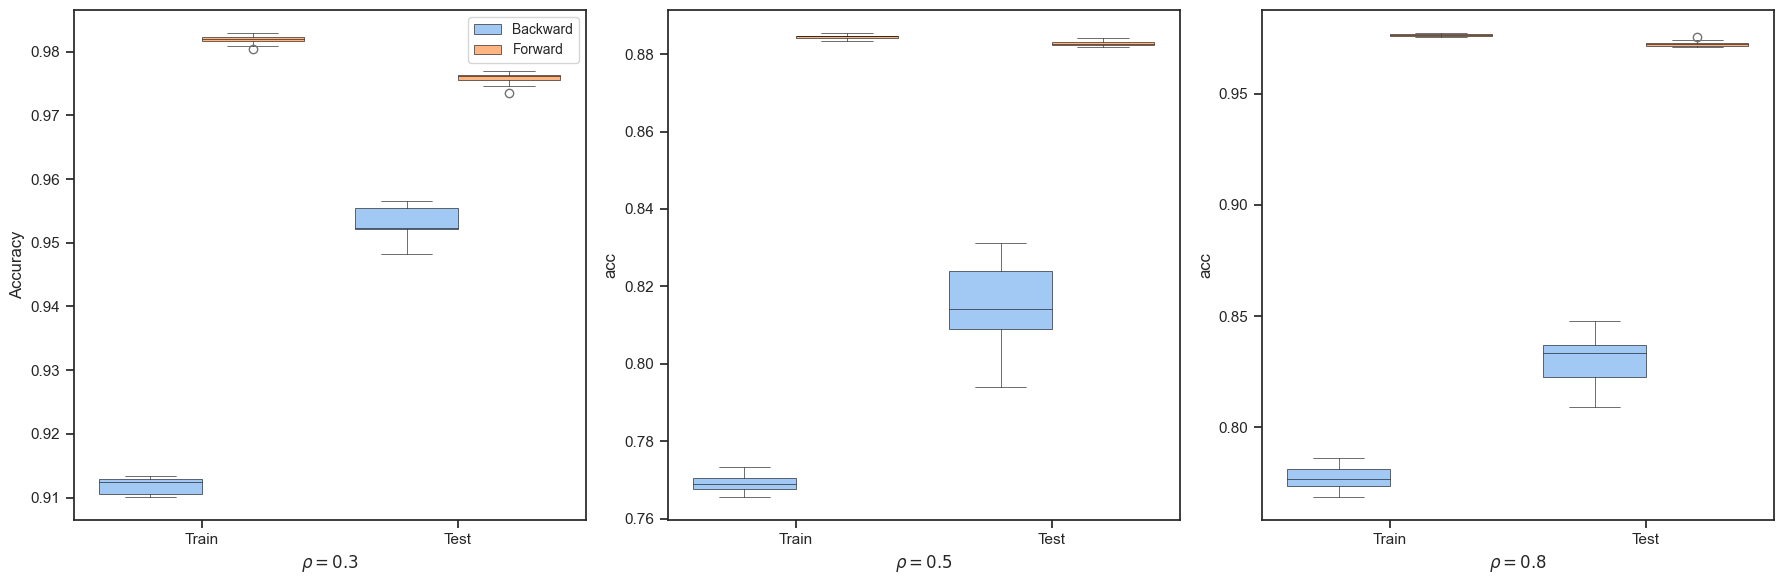

In [36]:
selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward', 'Forward']#'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Forward']#'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', , r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.3$')
axes[0].set_ylabel('Accuracy')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, new_labels,prop={'size': 10})
print(labels)
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
#axes[1].set_ylabel('Accuracy')
axes[1].legend().remove()

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\rho=0.8$')
#axes[2].set_ylabel('Accuracy')
axes[2].legend().remove()

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig2.eps', format='eps',dpi=1000)

# MNIST
## Complementary


In [37]:
df_list = []
folder_path = 'Results/mnist_Complementary'
#folder_path = 'Results/Old/mnist_Noisy_Patrini_MNIST'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\759293591.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\759293591.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\759293591.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.519450,Backward,0,0.2,Train
1,2,0.695200,Backward,0,0.2,Train
2,3,0.712983,Backward,0,0.2,Train
3,4,0.705367,Backward,0,0.2,Train
4,5,0.685533,Backward,0,0.2,Train
...,...,...,...,...,...,...
1495,46,0.912000,Forward,7,0.2,Test
1496,47,0.917300,Forward,7,0.2,Test
1497,48,0.910400,Forward,7,0.2,Test
1498,49,0.917100,Forward,7,0.2,Test


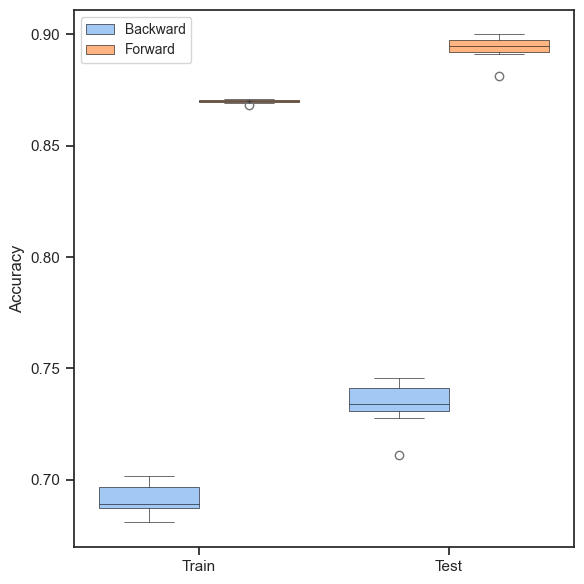

In [38]:
selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 5]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p'] == 0.2]

sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(6, 6))  # Use `ax` instead of `axes` and remove sharey

hue_order = ['Backward', 'Forward']
new_labels = ['Backward', 'Forward']

sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order=hue_order, saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))

# Set labels
#ax.set_xlabel(r'$\rho=0.3$')
ax.set_ylabel('Accuracy')
ax.set_xlabel(r'')

# Modify the legend with new labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_labels, prop={'size': 10})

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# MNIST
## Partial

In [39]:
df_list = []
folder_path = 'Results/mnist_pll'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\3787469204.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\3787469204.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\3787469204.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.785067,Backward_conv,0,0.2,Train
1,2,0.865033,Backward_conv,0,0.2,Train
2,3,0.874100,Backward_conv,0,0.2,Train
3,4,0.876700,Backward_conv,0,0.2,Train
4,5,0.878750,Backward_conv,0,0.2,Train
...,...,...,...,...,...,...
17095,46,0.923700,Forward,9,0.8,Test
17096,47,0.929800,Forward,9,0.8,Test
17097,48,0.928400,Forward,9,0.8,Test
17098,49,0.932800,Forward,9,0.8,Test


['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt', 'Forward']


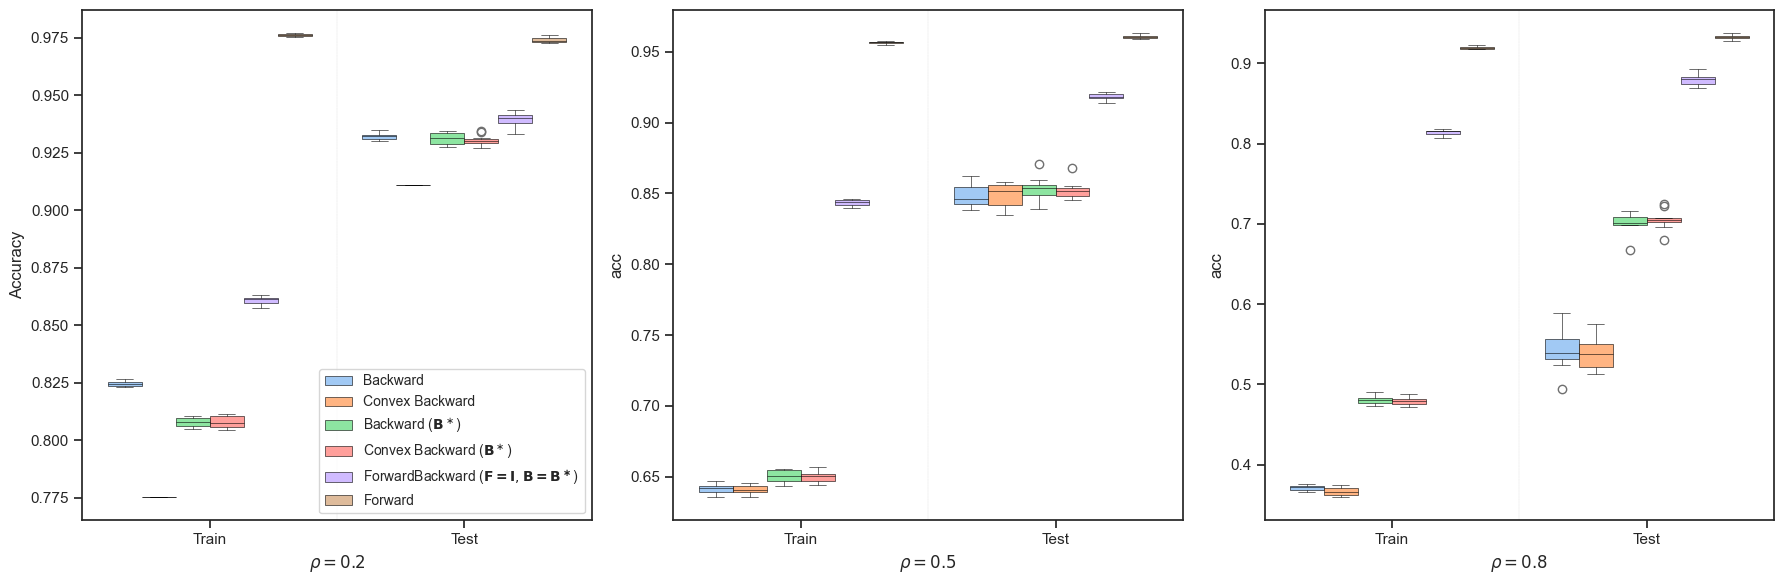

In [45]:
#selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
#last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt','Forward', ]
new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)',  r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)','Forward']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.2$')
axes[0].set_ylabel('Accuracy')
axes[0].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)


handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, new_labels,prop={'size': 10})
print(labels)
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
#axes[1].set_ylabel('Accuracy')
axes[1].legend().remove()
axes[1].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\rho=0.8$')
#axes[2].set_ylabel('Accuracy')
axes[2].legend().remove()
axes[2].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig5.eps', format='eps',dpi=1000)

In [23]:
pivot_train = merged_df.pivot_table(index='loss_fn', columns='corr_p', values='train_acc', aggfunc=['mean', 'std'])
pivot_train

mean                           std                    
corr_p                  0.2       0.5       0.8       0.2       0.5       0.8
loss_fn                                                                      
Backward           0.862143  0.727524  0.484767  0.024233  0.059138  0.095516
Backward_conv      0.831013  0.727396  0.482062  0.034805  0.059635  0.097261
Backward_opt       0.849964  0.735468  0.597243  0.026464  0.058319  0.088070
Backward_opt_conv  0.849986  0.735475  0.597155  0.026446  0.058322  0.088094
Forward            0.960604  0.940883  0.905780  0.023171  0.023599  0.027580
Forward_opt        0.885894  0.868775  0.841052  0.017637  0.019522  0.025053

In [24]:
pivot_test = merged_df.pivot_table(index='loss_fn', columns='corr_p', values='test_acc', aggfunc=['mean', 'std'])
pivot_test

mean                           std                    
corr_p                  0.2       0.5       0.8       0.2       0.5       0.8
loss_fn                                                                      
Backward           0.927391  0.859580  0.614220  0.010818  0.010090  0.052655
Backward_conv      0.912030  0.859816  0.612951  0.009255  0.010017  0.053598
Backward_opt       0.925724  0.864918  0.744453  0.011066  0.010004  0.031023
Backward_opt_conv  0.925545  0.864825  0.744437  0.010985  0.009936  0.030596
Forward            0.965726  0.952226  0.925222  0.012288  0.011742  0.010797
Forward_opt        0.935302  0.918686  0.887863  0.011102  0.009867  0.009639

# GMM
## Noisy

In [46]:
df_list = []
folder_path = 'Results/gmm_unif_noise'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\4037277151.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\4037277151.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\4037277151.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.789375,Backward,0,0.2,Train
1,2,0.798750,Backward,0,0.2,Train
2,3,0.798750,Backward,0,0.2,Train
3,4,0.800625,Backward,0,0.2,Train
4,5,0.804375,Backward,0,0.2,Train
...,...,...,...,...,...,...
5995,46,0.800000,Forward,9,0.8,Test
5996,47,0.801250,Forward,9,0.8,Test
5997,48,0.805000,Forward,9,0.8,Test
5998,49,0.805000,Forward,9,0.8,Test


['Backward', 'Forward']


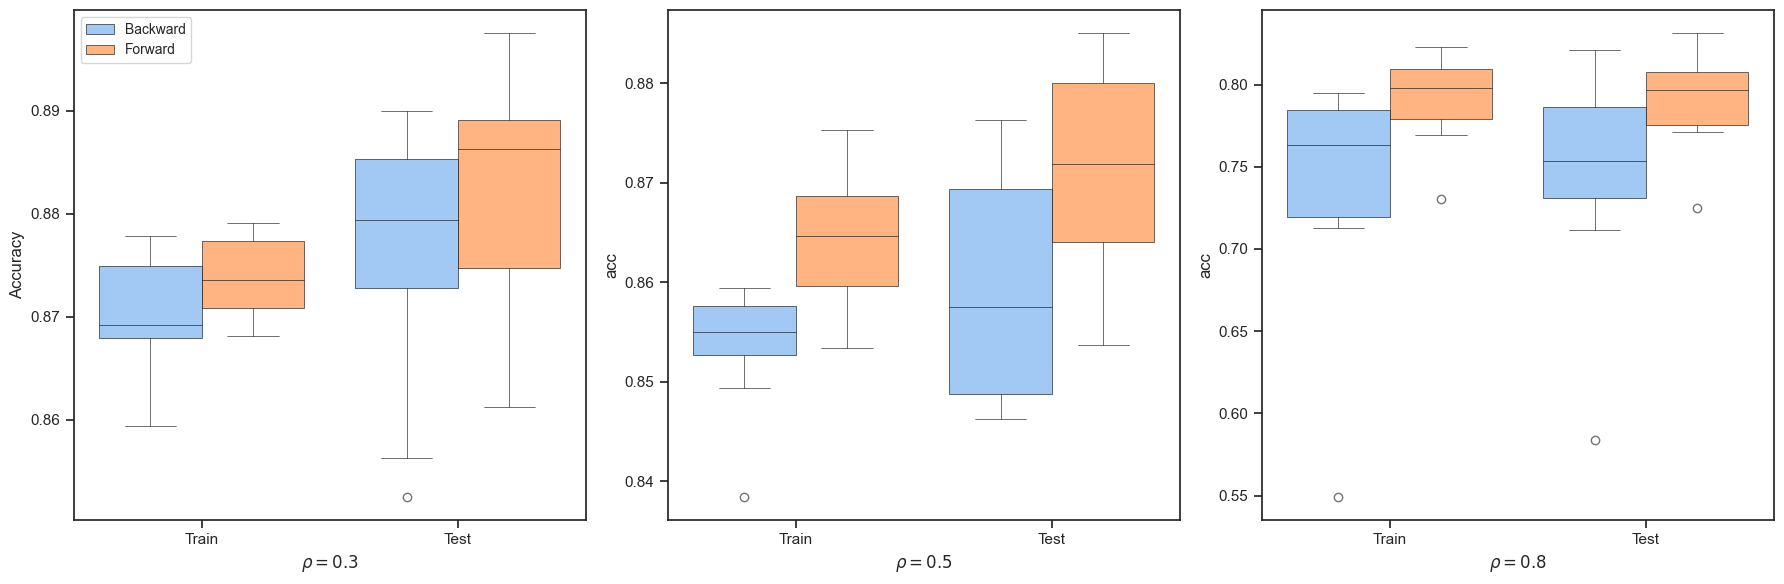

In [47]:
selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward', 'Forward']#'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Forward']#'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', , r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.3$')
axes[0].set_ylabel('Accuracy')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, new_labels,prop={'size': 10})
print(labels)
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
#axes[1].set_ylabel('Accuracy')
axes[1].legend().remove()

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\rho=0.8$')
#axes[2].set_ylabel('Accuracy')
axes[2].legend().remove()

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig6.eps', format='eps',dpi=1000)

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder = "Results/gmm_unif_noise"
corr = [0.2,0.5,0.8] 
soft = torch.nn.Softmax(dim=1)

losses = ['Backward', 'Forward',]
results = []
for cor in corr:
    for los in losses:
        for rep in range(10):
            model_file = folder + f"/{los}_p_+{cor}p_-None_{rep}.pkl"
            with open(model_file, "rb") as f:
                model = pickle.load(f)
                f.close()
            model = model['overall_models']

            data_folder = f"Datasets/weak_datasets/gmm_pll_p{cor}"
            data_file = data_folder +  f"/Dataset_{rep}.pkl"
            f = open(data_file,"rb")
            Data,Weak = pickle.load(f)
            data = Data.test_dataset.data.to(device)

            
            yhat = soft(model(data)).cpu().detach().numpy()
            POS = np.array([list(gmm_posterior(data[i,:].cpu().detach().numpy())) for i in range(data.shape[0])])
            AB = POS-yhat
            norms = np.diag(AB@AB.T)

            mean_norm = np.mean(norms)
            std_norm = np.std(norms)
            
            # Store values in the results list
            results.append({
                'Corruption':cor,
                "Loss Function": los,
                "Repetition": rep,
                "Mean norm": mean_norm,
                "Std norm": std_norm
            })
df_results = pd.DataFrame(results)
df_results

c:\Users\danibacaicoa\vscode_projects\ForwardBackard_losses\.venv\Lib\site-packages\torch\storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.

,Corruption,Loss Function,Repetition,Mean norm,Std norm
0,0.2,Backward,0,0.021349,0.074323
1,0.2,Backward,1,0.030327,0.055850
2,0.2,Backward,2,0.014460,0.036404
3,0.2,Backward,3,0.017886,0.070431
4,0.2,Backward,4,0.014451,0.041547
5,0.2,Backward,5,0.011472,0.045085
6,0.2,Backward,6,0.015048,0.048132
7,0.2,Backward,7,0.019501,0.073063
8,0.2,Backward,8,0.017447,0.043265
9,0.2,Backward,9,0.012004,0.026611


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\2911932630.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5','0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\2911932630.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5','0.8'])


['Backward', 'Forward']


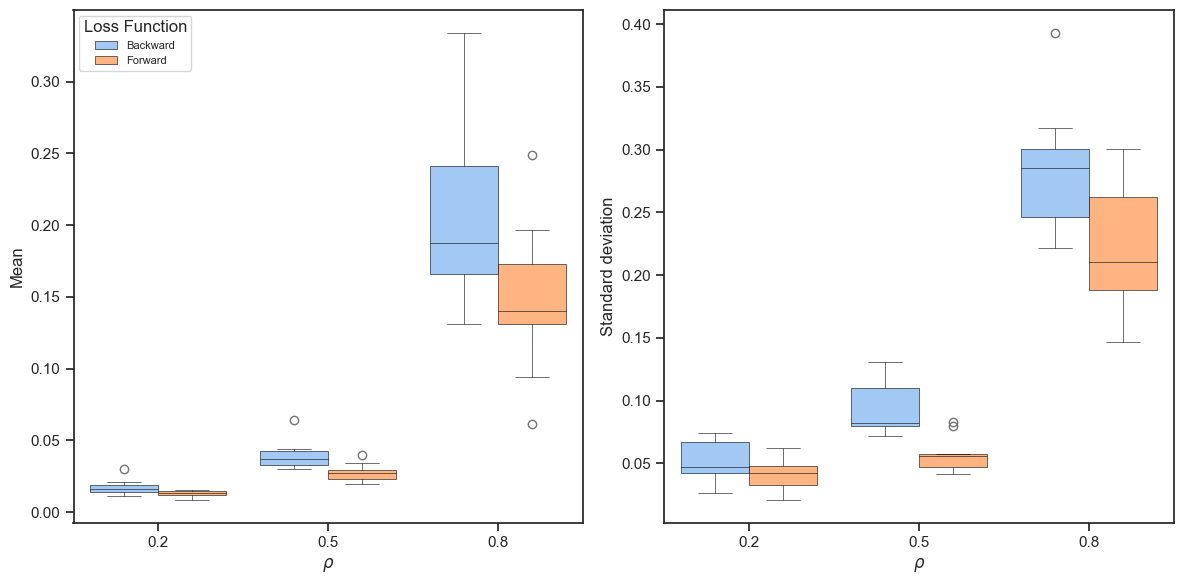

In [50]:
selected_loss_fns = ['Backward', 'Forward']
df_results = df_results[df_results['Loss Function'].isin(selected_loss_fns)]


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Mean norm',hue='Loss Function', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      # Box border
            whiskerprops=dict(color='black', linewidth=0.4),      # Whisker lines
            capprops=dict(color='black', linewidth=0.4),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.4))
#axes[0].set_title('Mean')
axes[0].set_ylabel('Mean')

axes[0].set_xticklabels(['0.2','0.5','0.8'])
axes[0].set_xlabel(r'$\rho$')
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
#['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Forward']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})

# Boxplot for test_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Std norm',hue='Loss Function', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      # Box border
            whiskerprops=dict(color='black', linewidth=0.4),      # Whisker lines
            capprops=dict(color='black', linewidth=0.4),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.4))
#axes[1].set_title('Standard deviation')
#axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
axes[1].set_ylabel('Standard deviation')
#axes[0].set_ylabel('Train Accuracy')
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].set_xlabel(r'$\rho$')
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig7.eps', format='eps',dpi=1000)

## GMM 
### Complementary

In [51]:
df_list = []
folder_path = 'Results/gmm_Complementary'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\414220636.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\414220636.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\414220636.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.780625,Backward_conv,0,0.2,Train
1,2,0.798125,Backward_conv,0,0.2,Train
2,3,0.798438,Backward_conv,0,0.2,Train
3,4,0.799063,Backward_conv,0,0.2,Train
4,5,0.800312,Backward_conv,0,0.2,Train
...,...,...,...,...,...,...
3995,46,0.873750,Forward,9,0.2,Test
3996,47,0.873750,Forward,9,0.2,Test
3997,48,0.875000,Forward,9,0.2,Test
3998,49,0.876250,Forward,9,0.2,Test


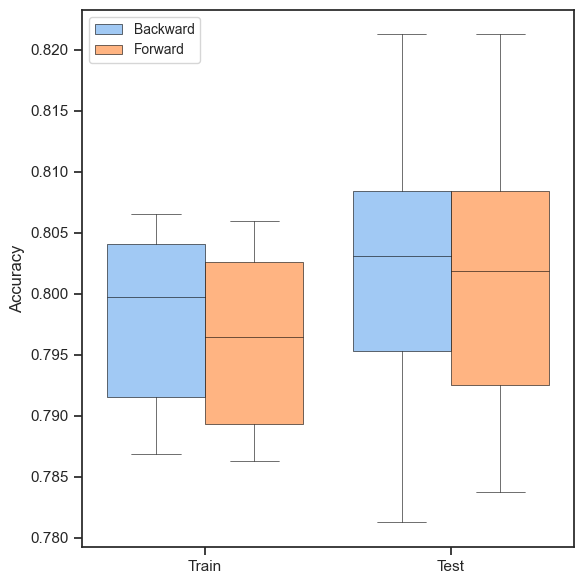

In [52]:
selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 5]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p'] == 0.2]

sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(6, 6))  # Use `ax` instead of `axes` and remove sharey

hue_order = ['Backward', 'Forward']
new_labels = ['Backward', 'Forward']

sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order=hue_order, saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))

# Set labels
#ax.set_xlabel(r'$\rho=0.3$')
ax.set_ylabel('Accuracy')
ax.set_xlabel(r'')

# Modify the legend with new labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_labels, prop={'size': 10})

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
#plt.savefig('Fig8.eps', format='eps',dpi=1000)

In [53]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder = "Results/gmm_Complementary"
corr = 0.2 
soft = torch.nn.Softmax(dim=1)

losses = ['Backward','Forward','Backward_conv','Forward_opt']
results = []
for los in losses:
    for rep in range(10):
        model_file = folder + f"/{los}_p_+{corr}p_-None_{rep}.pkl"
        with open(model_file, "rb") as f:
            model = pickle.load(f)
            f.close()
        model = model['overall_models']

        data_folder = f"Datasets/weak_datasets/gmm_Complementary_p{corr}"
        data_file = data_folder +  f"/Dataset_{rep}.pkl"
        f = open(data_file,"rb")
        Data,Weak = pickle.load(f)
        data = Data.test_dataset.data.to(device)

        
        yhat = soft(model(data)).cpu().detach().numpy()
        POS = np.array([list(gmm_posterior(data[i,:].cpu().detach().numpy())) for i in range(data.shape[0])])
        AB = POS-yhat
        norms = np.diag(AB@AB.T)

        mean_norm = np.mean(norms)
        std_norm = np.std(norms)
        
        # Store values in the results list
        results.append({
            'Corruption':corr,
            "Loss Function": los,
            "Repetition": rep,
            "Mean norm": mean_norm,
            "Std norm": std_norm
        })
df_results = pd.DataFrame(results)
df_results

c:\Users\danibacaicoa\vscode_projects\ForwardBackard_losses\.venv\Lib\site-packages\torch\storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.

,Corruption,Loss Function,Repetition,Mean norm,Std norm
0,0.2,Backward,0,0.039144,0.101689
1,0.2,Backward,1,0.046137,0.115211
2,0.2,Backward,2,0.077984,0.148482
3,0.2,Backward,3,0.044442,0.141842
4,0.2,Backward,4,0.056529,0.112485
5,0.2,Backward,5,0.037330,0.087704
6,0.2,Backward,6,0.036937,0.109335
7,0.2,Backward,7,0.050398,0.131645
8,0.2,Backward,8,0.036079,0.071810
9,0.2,Backward,9,0.038660,0.114467


['Backward', 'Forward']


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\2981861566.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([' '])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\2981861566.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([' '])


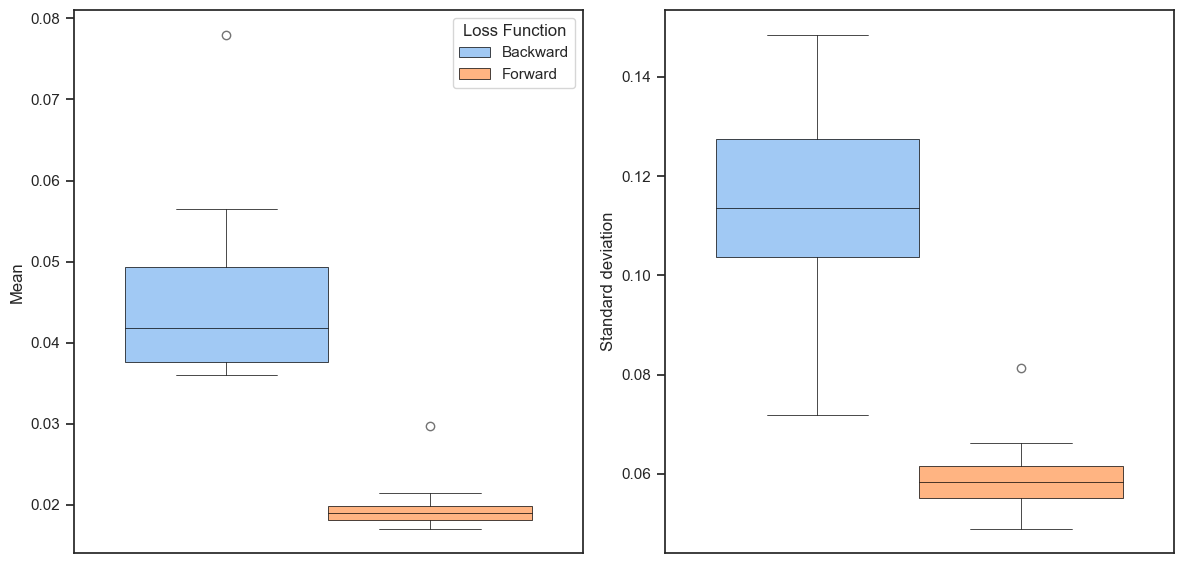

In [54]:
selected_loss_fns = ['Backward', 'Forward']
df_results = df_results[df_results['Loss Function'].isin(selected_loss_fns)]


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Mean norm',hue='Loss Function', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[0].set_title('Mean')
axes[0].set_xlabel(' ')
axes[0].set_ylabel('Mean')
axes[0].set_xticklabels([' '])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Boxplot for test_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Std norm',hue='Loss Function', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[1].set_title('Standard deviation')
#axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
axes[1].set_ylabel('Standard deviation')
axes[1].set_xlabel(' ')
#axes[0].set_ylabel('Train Accuracy')
axes[1].set_xticklabels([' '])
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig9.eps', format='eps',dpi=1000)

## GMM 
### Partial

In [55]:
df_list = []
folder_path = 'Results/gmm_pll'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\1096660501.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\1096660501.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\1096660501.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.790000,Backward_conv,0,0.2,Train
1,2,0.799375,Backward_conv,0,0.2,Train
2,3,0.800625,Backward_conv,0,0.2,Train
3,4,0.802188,Backward_conv,0,0.2,Train
4,5,0.803750,Backward_conv,0,0.2,Train
...,...,...,...,...,...,...
17995,46,0.887500,Forward,9,0.8,Test
17996,47,0.887500,Forward,9,0.8,Test
17997,48,0.888750,Forward,9,0.8,Test
17998,49,0.890000,Forward,9,0.8,Test


['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt', 'Forward']


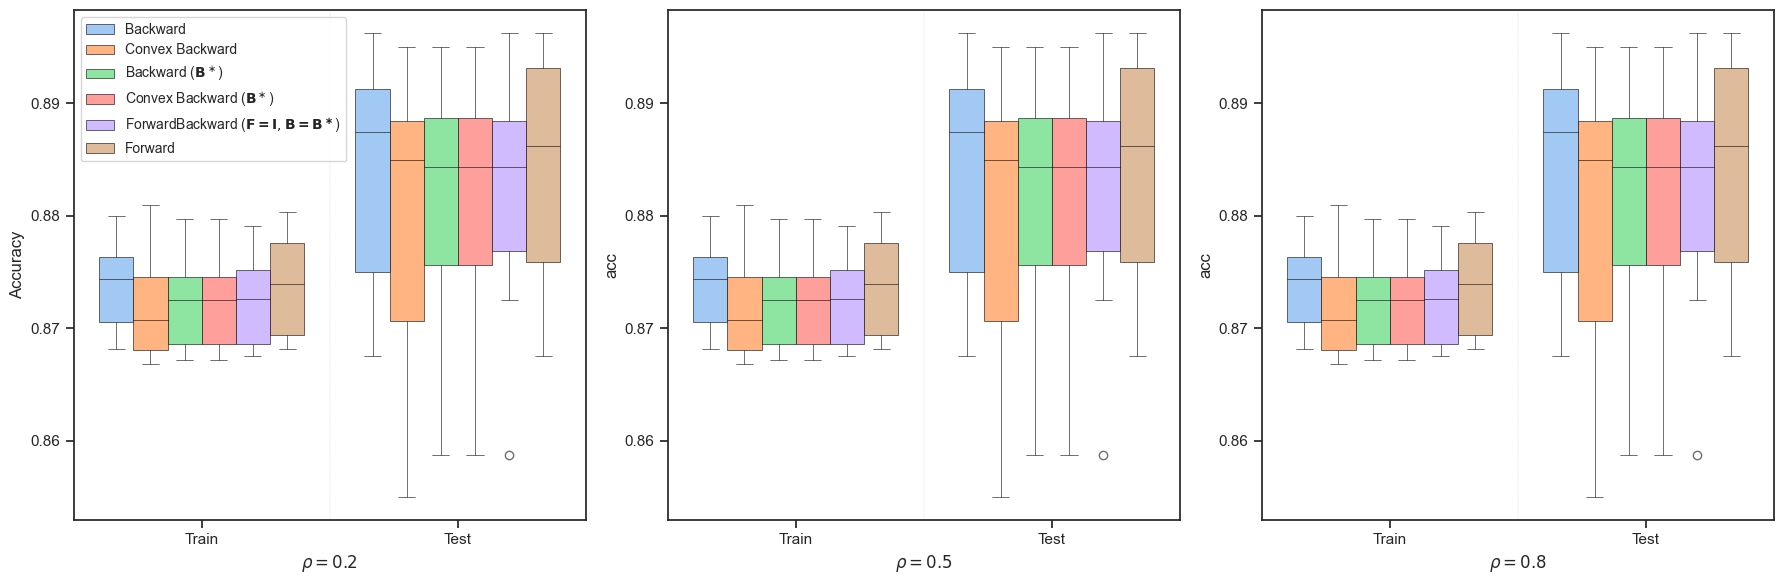

In [57]:
#selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
#last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt','Forward', ]
new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)',  r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)','Forward']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.2$')
axes[0].set_ylabel('Accuracy')
axes[0].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)


handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, new_labels,prop={'size': 10})
print(labels)
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
#axes[1].set_ylabel('Accuracy')
axes[1].legend().remove()
axes[1].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\rho=0.8$')
#axes[2].set_ylabel('Accuracy')
axes[2].legend().remove()
axes[2].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig10.eps', format='eps',dpi=1000)

In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder = "Results/gmm_pll"
corr = [0.2,0.5,0.8] 
soft = torch.nn.Softmax(dim=1)

losses = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
results = []
for cor in corr:
    for los in losses:
        for rep in range(10):
            model_file = folder + f"/{los}_p_+{cor}p_-None_{rep}.pkl"
            with open(model_file, "rb") as f:
                model = pickle.load(f)
                f.close()
            model = model['overall_models']

            data_folder = f"Datasets/weak_datasets/gmm_pll_p{cor}"
            data_file = data_folder +  f"/Dataset_{rep}.pkl"
            f = open(data_file,"rb")
            Data,Weak = pickle.load(f)
            data = Data.test_dataset.data.to(device)

            
            yhat = soft(model(data)).cpu().detach().numpy()
            POS = np.array([list(gmm_posterior(data[i,:].cpu().detach().numpy())) for i in range(data.shape[0])])
            AB = POS-yhat
            norms = np.diag(AB@AB.T)

            mean_norm = np.mean(norms)
            std_norm = np.std(norms)
            
            # Store values in the results list
            results.append({
                'Corruption':cor,
                "Loss Function": los,
                "Repetition": rep,
                "Mean norm": mean_norm,
                "Std norm": std_norm
            })
df_results = pd.DataFrame(results)
df_results

c:\Users\danibacaicoa\vscode_projects\ForwardBackard_losses\.venv\Lib\site-packages\torch\storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.

,Corruption,Loss Function,Repetition,Mean norm,Std norm
0,0.2,Backward,0,0.012682,0.067401
1,0.2,Backward,1,0.008343,0.029940
2,0.2,Backward,2,0.009030,0.033856
3,0.2,Backward,3,0.012604,0.052628
4,0.2,Backward,4,0.008928,0.027122
...,...,...,...,...,...
175,0.8,Forward_opt,5,0.011434,0.050343
176,0.8,Forward_opt,6,0.008114,0.047279
177,0.8,Forward_opt,7,0.018575,0.051122
178,0.8,Forward_opt,8,0.011673,0.043362


['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt', 'Forward']


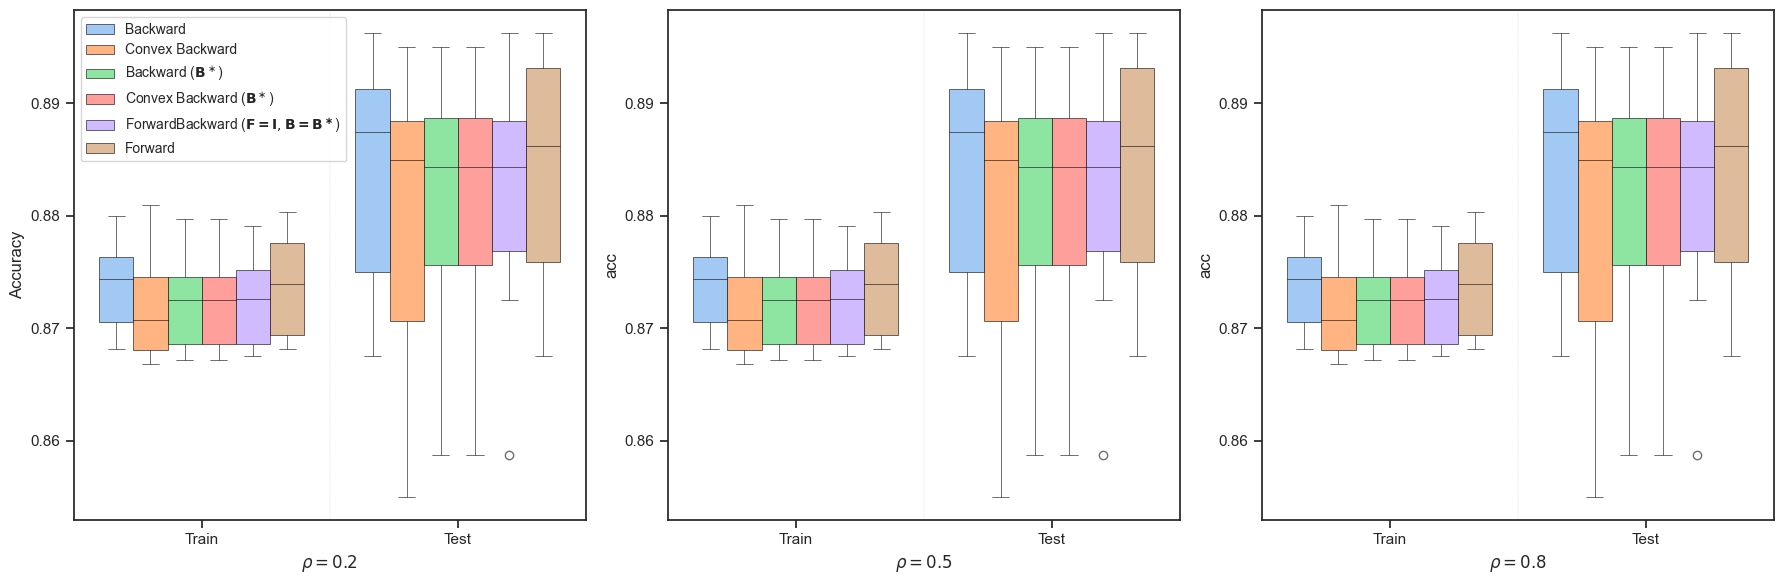

In [56]:
last_epoch_df = merged_df.loc[merged_df.groupby(['repetition', 'corr_p', 'loss_fn'])['epoch'].idxmax()]
#epoch_50_df = merged_df[merged_df['epoch'] == 5]

epoch_50_df = last_epoch_df
#selected_loss_fns = ['Backward', 'Forward']
#epoch_50_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='train_acc', hue='loss_fn', ax=axes[0],
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
axes[0].set_title('Train Accuracy')
axes[0].set_xlabel(r'$\rho$')
axes[0].set_ylabel('Train Accuracy')
axes[0].set_xticklabels(['0.2','0.5','0.8'])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', 'Forward', r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})
#axes[0].legend(title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])

# Boxplot for test_acc
sns.boxplot(data=epoch_50_df, x='corr_p', y='test_acc', hue='loss_fn', ax=axes[1],
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
axes[1].set_title('Test Accuracy')
axes[1].set_xlabel(r'$\rho$')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()

['Backward', 'Forward']


C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\708583843.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5','0.8'])
C:\Users\danibacaicoa\AppData\Local\Temp\ipykernel_15868\708583843.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5','0.8'])


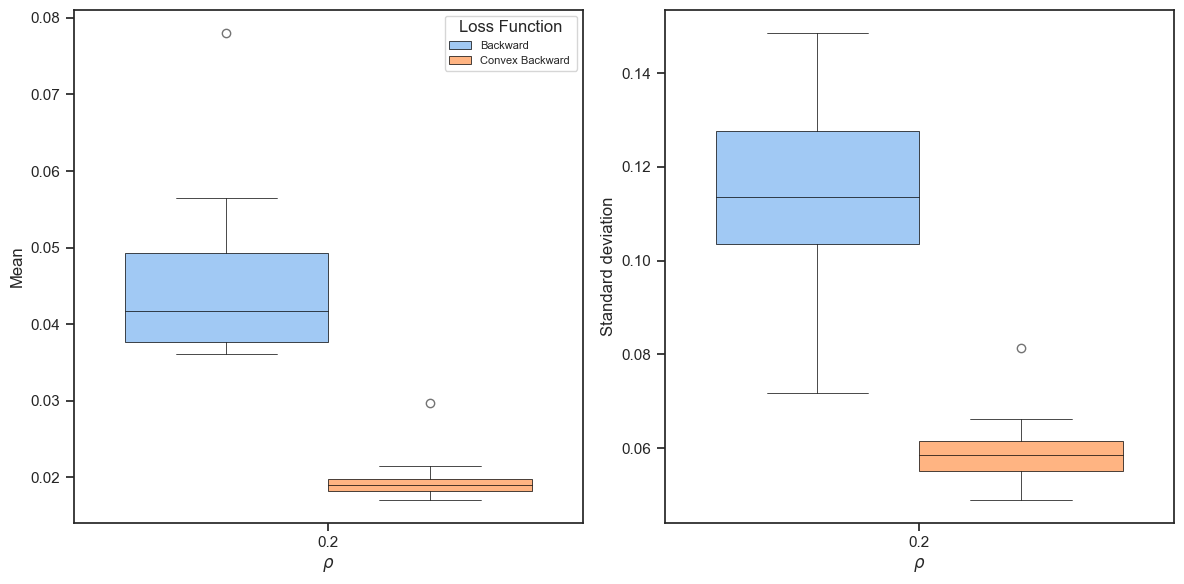

In [58]:
selected_loss_fns = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
df_results = df_results[df_results['Loss Function'].isin(selected_loss_fns)]


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Mean norm',hue='Loss Function', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[0].set_title('Mean')
axes[0].set_ylabel('Mean')

axes[0].set_xticklabels(['0.2','0.5','0.8'])
axes[0].set_xlabel(r'$\rho$')
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
#['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Backward', 'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', 'Forward', r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})

# Boxplot for test_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Std norm',hue='Loss Function', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[1].set_title('Standard deviation')
#axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
axes[1].set_ylabel('Standard deviation')
#axes[0].set_ylabel('Train Accuracy')
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].set_xlabel(r'$\rho$')
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig11.eps', format='eps',dpi=1000)